In [1]:
# compare the old HH version and the new HH version (i.e., main CTSM branch)
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, glob

# one-basin; one-parameter set

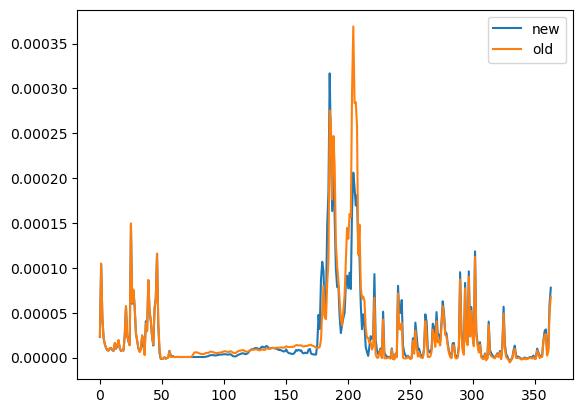

In [2]:
n=0
ds1=xr.load_dataset(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_0_MOASMOcalib/ctsm_outputs/iter0_trial{n}/lnd/hist/level1_0_iter0_trial{n}.clm2.h1.2008-10-01-00000.nc')
ds2=xr.load_dataset(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_0_MOASMOcalib/ctsm_outputs_oldhh/iter0_trial{n}/lnd/hist/level1_0_iter0_trial{n}.clm2.h1.2008-10-01-00000.nc')

import matplotlib.pyplot as plt
plt.plot(ds1.QRUNOFF.values[1:], label='new')
plt.plot(ds2.QRUNOFF.values[1:], label='old')
plt.legend()

# one basin; all parameter sets

In [3]:
b = 2
met1 = np.zeros([400, 2])
met2 = np.zeros([400, 2])

for n in range(400):
    df1=pd.read_csv(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_trial{n}/evaluation_metric.csv')
    df2=pd.read_csv(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs_oldhh/iter0_trial{n}/evaluation_metric.csv')
    met1[n, 0] = df1['metric1'].values[0]
    met2[n, 0] = df1['metric2'].values[0]

    met1[n, 1] = df2['metric1'].values[0]
    met2[n, 1] = df2['metric2'].values[0]

print('new/old hh bias-1', np.nanmean(met1, axis=0))
print('new/old hh bias-2', np.nanmean(met2, axis=0))
print('new/old default param bias-1', met1[0,:])
print('new/old default param bias-2', met2[0,:])

new/old hh bias-1 [133.8406579  117.41261431]
new/old hh bias-2 [172.05815668 190.63537138]
new/old default param bias-1 [104.36154671  96.73035202]
new/old default param bias-2 [120.78580806 161.25183346]


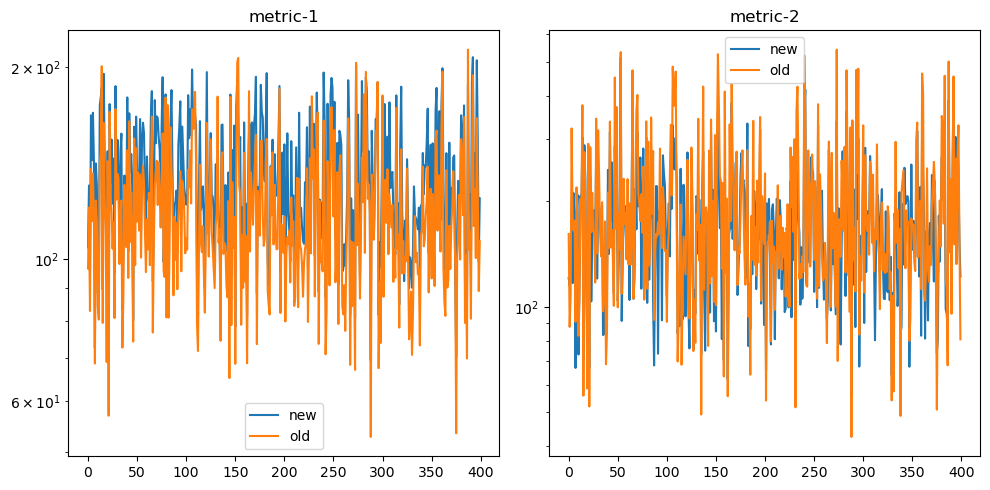

In [22]:
fig = plt.figure(figsize=[10,  5])

fig.add_subplot(1,2,1)
plt.plot(met1[:,0], label='new')
plt.plot(met1[:,1], label='old')
plt.yscale('log')
plt.title('metric-1')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(met2[:,0], label='new')
plt.plot(met2[:,1], label='old')
plt.yscale('log')
plt.title('metric-2')
plt.legend()

plt.tight_layout()
plt.show()

# all basins; all parameter sets

In [ ]:
met1 = np.zeros([55, 400, 2])
met2 = np.zeros([55, 400, 2])

for b in range(55):

    for n in range(400):
        df1=pd.read_csv(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_trial{n}/evaluation_metric.csv')
        df2=pd.read_csv(f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs_oldhh/iter0_trial{n}/evaluation_metric.csv')
        met1[b, n, 0] = df1['metric1'].values[0]
        met2[b, n, 0] = df1['metric2'].values[0]
    
        met1[b, n, 1] = df2['metric1'].values[0]
        met2[b, n, 1] = df2['metric2'].values[0]

new/old hh bias-1 [9.3429481 8.9189254]
new/old hh bias-2 [14.68103372 14.98992005]


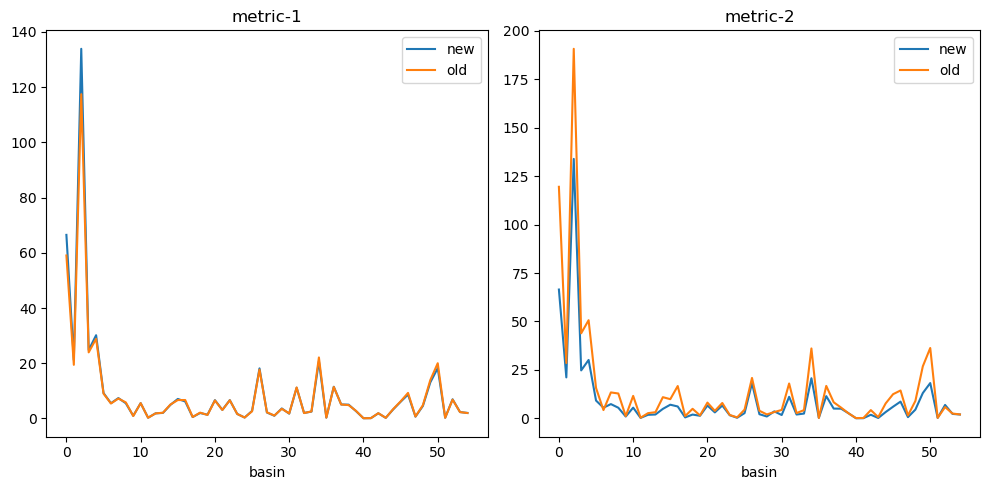

In [31]:
met1_mean = np.mean(met1, axis=1)
met2_mean = np.mean(met2, axis=1)

print('new/old hh bias-1', np.nanmean(met1_mean, axis=0))
print('new/old hh bias-2', np.nanmean(met2_mean, axis=0))

fig = plt.figure(figsize=[10,  5])

fig.add_subplot(1,2,1)
plt.plot(met1_mean[:,0], label='new')
plt.plot(met1_mean[:,1], label='old')
# plt.yscale('log')
plt.title('metric-1')
plt.xlabel('basin')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(met1_mean[:,0], label='new')
plt.plot(met2_mean[:,1], label='old')
# plt.yscale('log')
plt.title('metric-2')
plt.xlabel('basin')
plt.legend()

plt.tight_layout()
plt.show()

# all basins; default parameters

In [4]:
met1 = np.nan * np.zeros([627, 2])
met2 = np.nan * np.zeros([627, 2])

for n in range(627):
    file1 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{n}_MOASMOcalib/ctsm_outputs/iter0_trial0/evaluation_metric.csv'
    file2 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{n}_MOASMOcalib/ctsm_outputs_oldhh/iter0_trial0/evaluation_metric.csv'
    if os.path.isfile(file1) and os.path.isfile(file2):
    
        df1=pd.read_csv(file1)
        df2=pd.read_csv(file2)
        met1[n, 0] = df1['metric1'].values[0]
        met2[n, 0] = df1['metric2'].values[0]
        
        met1[n, 1] = df2['metric1'].values[0]
        met2[n, 1] = df2['metric2'].values[0]

new/old hh bias [7.99884756 7.9243506 ]
new/old hh bias [10.51685384 10.66956359]
0.4194577352472089
0.3668261562998405


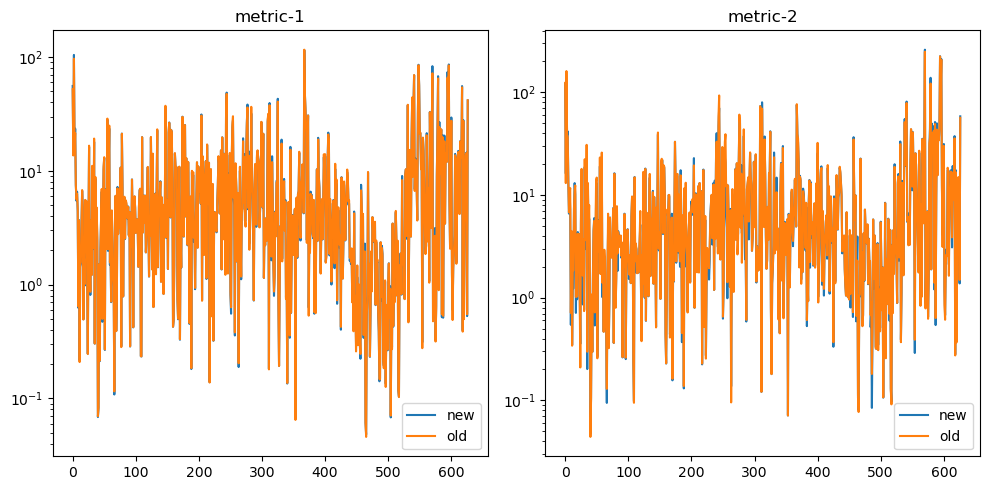

In [8]:
# print('new hh bias', np.nanmedian(met1, axis=0))
# print('new hh bias', np.nanmedian(met2, axis=0))
print('new/old hh bias', np.nanmean(met1, axis=0))
print('new/old hh bias', np.nanmean(met2, axis=0))
print(np.sum(met1[:,0]>met2[:,0])/np.sum(~np.isnan(met1[:,0])))
print(np.sum(met1[:,1]>met2[:,1])/np.sum(~np.isnan(met1[:,1])))

fig = plt.figure(figsize=[10,  5])

fig.add_subplot(1,2,1)
plt.plot(met1[:,0], label='new')
plt.plot(met1[:,1], label='old')
plt.yscale('log')
plt.title('metric-1')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(met2[:,0], label='new')
plt.plot(met2[:,1], label='old')
plt.yscale('log')
plt.title('metric-2')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
met1[0,:]

array([55.68860921, 52.02149258])